<a href="https://colab.research.google.com/github/saideepthimalugu/student-academic-predication-/blob/main/academic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating and Forecasting Students' Academic Achievement through Machine Learning
**Student Name:** Malugu Sai Deepthi  
- **Student ID:** 23070109  
- **Email:** malugusaideepthi@gmail.com  
- **Course:** 2-Year Advanced Research (MSc Data Science)  
- **Module:** 7PAM2002 – Data Science Project  
- **Semester:** A 2025/2026  
- **Supervisor:** Vanadana Das


**Project Aim**

To apply machine learning algorithms to predict students’ academic outcomes and identify key personal, social, and academic factors influencing their success.

**Research Question**

Which personal, social, and school-related factors are most often determinants of students' academic performance, and can data science methods be used to accurately predict their final grades?

 **Dataset Information**
- **Source:** UCI Machine Learning Repository – *Student Performance Dataset*  
- **URL:** [https://archive.ics.uci.edu/ml/datasets/student+performance](https://archive.ics.uci.edu/ml/datasets/student+performance)  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
math_df = pd.read_csv("student-mat.csv", sep=";")
por_df = pd.read_csv("student-por.csv", sep=";")

print("Math dataset shape:", math_df.shape)
print("Portuguese dataset shape:", por_df.shape)

Math dataset shape: (395, 33)
Portuguese dataset shape: (649, 33)


In [3]:
math_df["subject"] = "math"
por_df["subject"] = "por"


In [4]:
df = pd.concat([math_df, por_df], ignore_index=True)

print("dataset combined shape:", df.shape)
print(df.head())

dataset combined shape: (1044, 34)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 subject  
0        3     4     1     1       3        6   5   6   6    math  
1        3     3     1     1       3        4   5   5   6    math  
2        3     2     2     3       3       10   7   8  10    math  
3        2     2     1     1       5        2  15  14  15    math  
4        3     2     1     2       5        4   6  10  10    math  

[5 rows x 34 columns]


In [5]:
print("Missing values per column:")
print(df.isnull().sum())
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Columns with missing values :")
print(missing)

Missing values per column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
subject       0
dtype: int64
Columns with missing values :
Series([], dtype: int64)


In [6]:
print("duplicate rows:", df.duplicated().sum())


if df.duplicated().sum() > 0:
    print("Duplicate rows:")
    print(df[df.duplicated()])
else:
    print("Not found ")

duplicate rows: 0
Not found 


In [7]:
print("Data Types:")
print(df.dtypes)

Data Types:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
subject       object
dtype: object


In [48]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,por
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,por
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,por
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,por


In [11]:
print(df.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject'],
      dtype='object')


In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numeric_features = df.select_dtypes(include=['int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


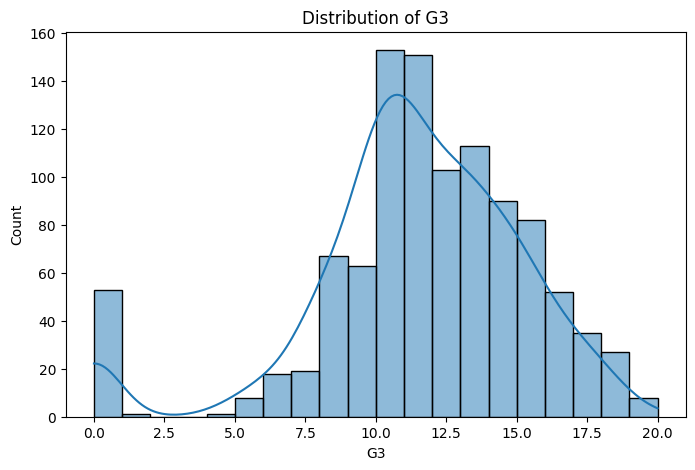

In [13]:


plt.figure(figsize=(8,5))
sns.histplot(df['G3'], bins=20, kde=True)
plt.title("Distribution of G3")
plt.xlabel("G3")
plt.ylabel("Count")
plt.savefig("Distribution of final grade.png",dpi=200, bbox_inches='tight')
plt.show()


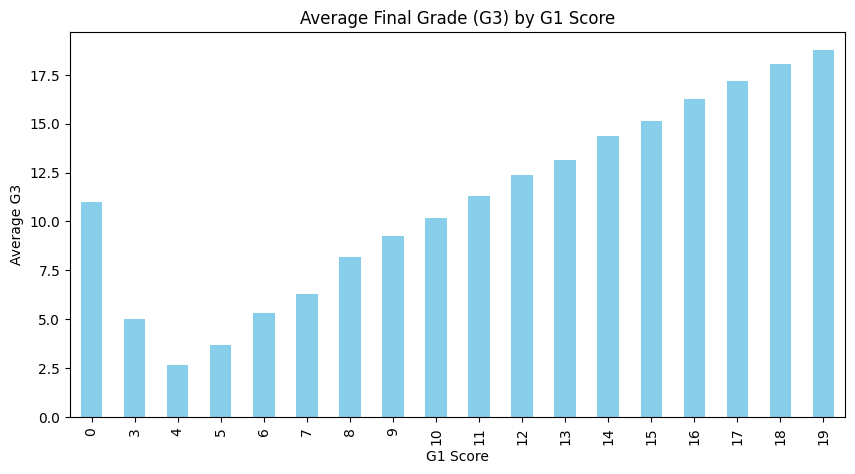

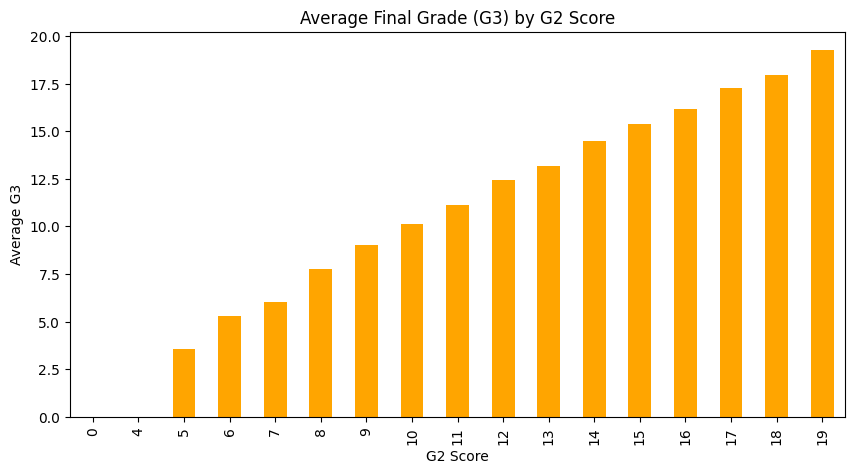

In [14]:
df.groupby('G1')['G3'].mean().plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title("Average Final Grade (G3) by G1 Score")
plt.xlabel("G1 Score")
plt.ylabel("Average G3")
plt.savefig("Average final grade (g3) by g1 score.png",dpi=200, bbox_inches='tight')
plt.show()

df.groupby('G2')['G3'].mean().plot(kind='bar', color='orange', figsize=(10,5))
plt.title("Average Final Grade (G3) by G2 Score")
plt.xlabel("G2 Score")
plt.ylabel("Average G3")
plt.savefig("Average final grade (g3) by g2 score.png",dpi=200, bbox_inches='tight')
plt.show()



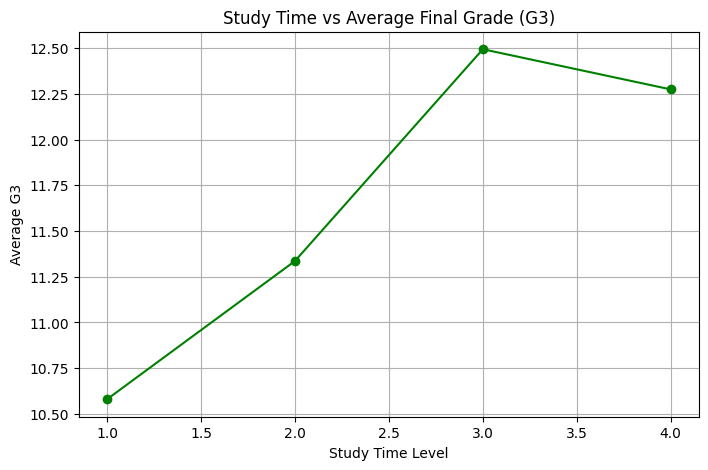

In [15]:
# Study Time vs Final Grade
plt.figure(figsize=(8,5))
df.groupby('studytime')['G3'].mean().plot(kind='line', marker='o', color='green')
plt.title("Study Time vs Average Final Grade (G3)")
plt.xlabel("Study Time Level")
plt.ylabel("Average G3")
plt.grid(True)
plt.savefig("Study time vs avaerage final grade (g3).png",dpi=200, bbox_inches='tight')
plt.show()

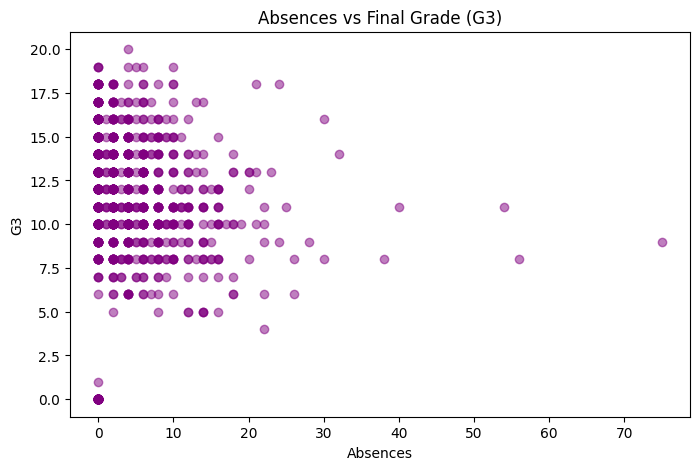

In [16]:
#  Absences vs Final Grade
plt.figure(figsize=(8,5))
plt.scatter(df['absences'], df['G3'], alpha=0.5, color='purple')
plt.title("Absences vs Final Grade (G3)")
plt.xlabel("Absences")
plt.ylabel("G3")
plt.savefig("Absence vs final grade (g3).png",dpi=200, bbox_inches='tight')
plt.show()

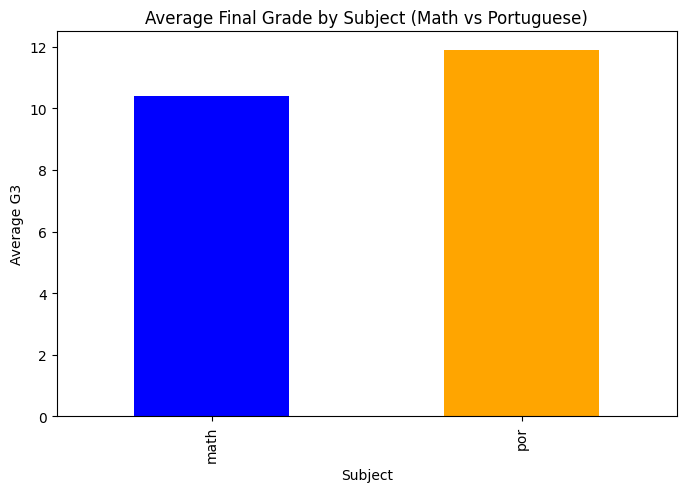

In [17]:
plt.figure(figsize=(8,5))
df.groupby('subject')['G3'].mean().plot(kind='bar', color=['blue','orange'])
plt.title("Average Final Grade by Subject (Math vs Portuguese)")
plt.xlabel("Subject")
plt.ylabel("Average G3")
plt.savefig("Average final grade (g3) by subject.png",dpi=200, bbox_inches='tight')
plt.show()

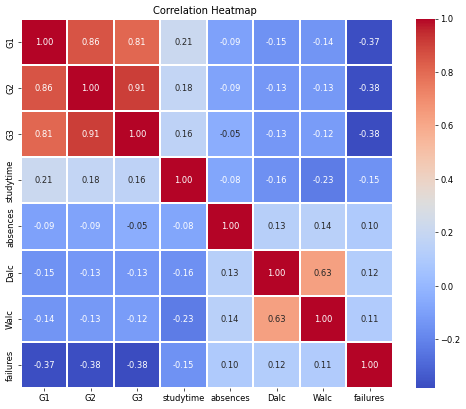

In [18]:
important_cols = ['G1','G2','G3','studytime','absences','Dalc','Walc','failures']

plt.figure(figsize=(10,8), dpi=60)
sns.heatmap(df[important_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap ")
plt.savefig("Correlation heatmap.png",dpi=200, bbox_inches='tight')
plt.show()


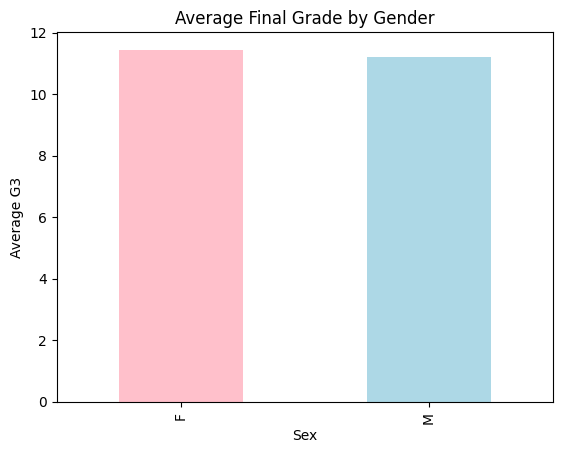

In [19]:
df.groupby('sex')['G3'].mean().plot(kind='bar', color=['pink','lightblue'])

plt.title("Average Final Grade by Gender")
plt.xlabel("Sex")
plt.ylabel("Average G3")
plt.show()


            RANDOM FOREST

In [20]:
X = df.drop(columns=['G3'])   # features only
y = df['G3']                  # target


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)


Numeric: Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')
Categorical: Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'subject'],
      dtype='object')


In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])


In [25]:
rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'subject'],
      dtype='object'))])),
                ('model',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Results:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Random Forest Results:
MAE : 0.9347846889952154
RMSE: 1.6343408018095034
R²  : 0.8272361901490204


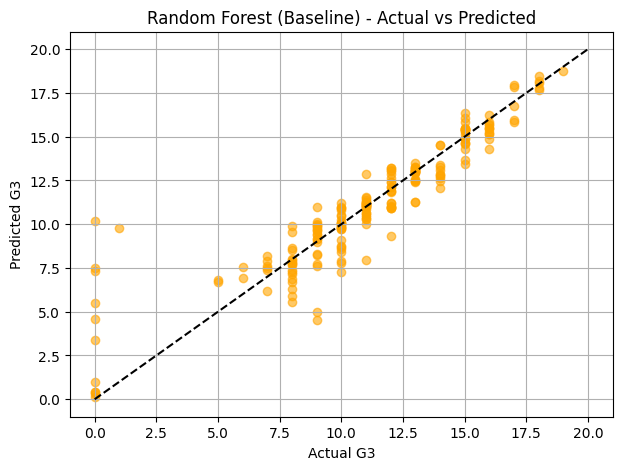

In [27]:
import matplotlib.pyplot as plt


y_pred_base = rf_model.predict(X_test)

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_base, alpha=0.6, color='orange')
plt.plot([0,20],[0,20], 'k--')
plt.title("Random Forest (Baseline) - Actual vs Predicted")
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.grid(True)
plt.show()


Hyperparameter tuning RF

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


rf_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

# Hyperparameter
param_dist = {
    "model__n_estimators": [100, 200, 300, 400, 500],
    "model__max_depth": [None, 5, 10, 15, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2", 0.5]
}

# Randomized search
rf_search = RandomizedSearchCV(
    estimator=rf_pipe,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_absolute_error",
    random_state=42,
    n_jobs=-1
)

# Run the search
rf_search.fit(X_train, y_train)

print("Best Parameters:")
print(rf_search.best_params_)
print("\nBest CV Score (negative MAE):", rf_search.best_score_)


Best Parameters:
{'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_features': 0.5, 'model__max_depth': 10}

Best CV Score (negative MAE): -0.8798619524898174


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_rf_model = rf_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nTuned Random Forest Results:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)



Tuned Random Forest Results:
MAE : 0.8918444194866575
RMSE: 1.5379050420790359
R²  : 0.8470228491703382


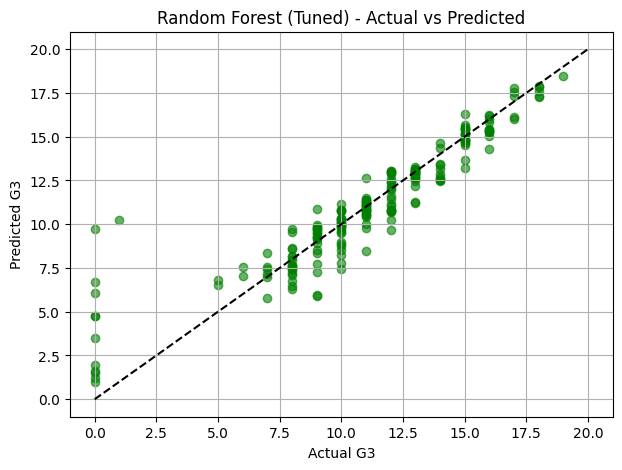

In [30]:
# Predictions from tuned RF model
y_pred_tuned = best_rf_model.predict(X_test)

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_tuned, alpha=0.6, color='green')
plt.plot([0,20],[0,20], 'k--')
plt.title("Random Forest (Tuned) - Actual vs Predicted")
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.grid(True)
plt.savefig("Random Forest performance.png",dpi=200, bbox_inches='tight')
plt.show()


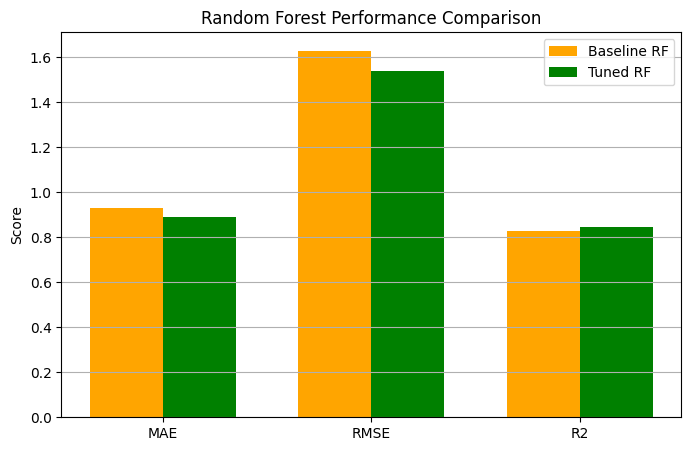

In [31]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['MAE', 'RMSE', 'R2']
baseline = [0.93, 1.63, 0.83]
tuned = [0.89, 1.54, 0.847]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, baseline, width, label='Baseline RF', color='orange')
plt.bar(x + width/2, tuned, width, label='Tuned RF', color='green')
plt.xticks(x, metrics)
plt.title("Random Forest Performance Comparison")
plt.ylabel("Score")
plt.legend()
plt.grid(axis='y')
plt.savefig("Random Forest performance comparison.png",dpi=200, bbox_inches='tight')
plt.show()


Gradient Boosting Model

In [32]:

X = df.drop(columns=['G3'])
y = df['G3']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])


In [34]:
gbr_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'subject'],
      dtype='object'))])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=200,
                                           random_state=42))])

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_gbr = gbr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_gbr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2 = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Results:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Gradient Boosting Results:
MAE : 0.8997256771892256
RMSE: 1.5720192900037657
R²  : 0.8401608106748922


Hyperparameter tuning of GB

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Base GBR pipeline
gbr_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))
])

# Hyperparameter search space
param_dist_gbr = {
    "model__n_estimators": [100, 200, 300, 400],
    "model__learning_rate": [0.01, 0.03, 0.05, 0.1],
    "model__max_depth": [2, 3, 4, 5],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__subsample": [0.7, 0.8, 0.9, 1.0]
}

gbr_search = RandomizedSearchCV(
    estimator=gbr_pipe,
    param_distributions=param_dist_gbr,
    n_iter=20,                     # number of random combos to try
    cv=5,                          # 5-fold CV
    scoring="neg_mean_absolute_error",
    random_state=42,
    n_jobs=-1
)

# Run the search
gbr_search.fit(X_train, y_train)

print("Best Parameters (GBR):")
print(gbr_search.best_params_)
print("\nBest CV Score (negative MAE):", gbr_search.best_score_)


Best Parameters (GBR):
{'model__subsample': 0.9, 'model__n_estimators': 300, 'model__min_samples_split': 10, 'model__min_samples_leaf': 1, 'model__max_depth': 4, 'model__learning_rate': 0.01}

Best CV Score (negative MAE): -0.8560138460103349


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_gbr_model = gbr_search.best_estimator_

y_pred_gbr_tuned = best_gbr_model.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr_tuned)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr_tuned))
r2_gbr = r2_score(y_test, y_pred_gbr_tuned)

print("\nTuned Gradient Boosting Results:")
print("MAE :", mae_gbr)
print("RMSE:", rmse_gbr)
print("R²  :", r2_gbr)



Tuned Gradient Boosting Results:
MAE : 0.8921104032125925
RMSE: 1.5850869230954754
R²  : 0.8374923939664048


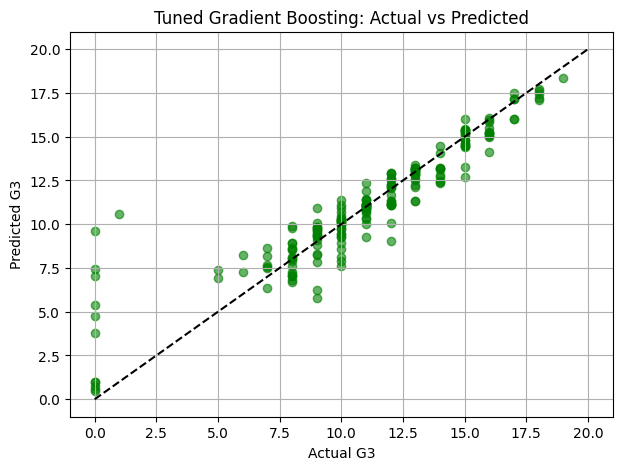

In [38]:
import matplotlib.pyplot as plt

y_pred_gbr_tuned = best_gbr_model.predict(X_test)

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_gbr_tuned, alpha=0.6, color='green')
plt.plot([0,20], [0,20], 'k--')  # Perfect line
plt.title("Tuned Gradient Boosting: Actual vs Predicted")
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.grid(True)
plt.show()


Support Vector Regression Model

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# SVR model pipeline
svr_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", SVR(kernel='rbf', C=100, gamma='scale'))
])

In [40]:
svr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'subject'],
      dtype='object'))])),
                ('model', SVR(C=100))])

In [41]:
y_pred_svr = svr_model.predict(X_test)

In [42]:
mae = mean_absolute_error(y_test, y_pred_svr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2 = r2_score(y_test, y_pred_svr)

print("SVR Results:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)

SVR Results:
MAE : 1.3518836019827418
RMSE: 2.0772209052517505
R²  : 0.7209173129077979


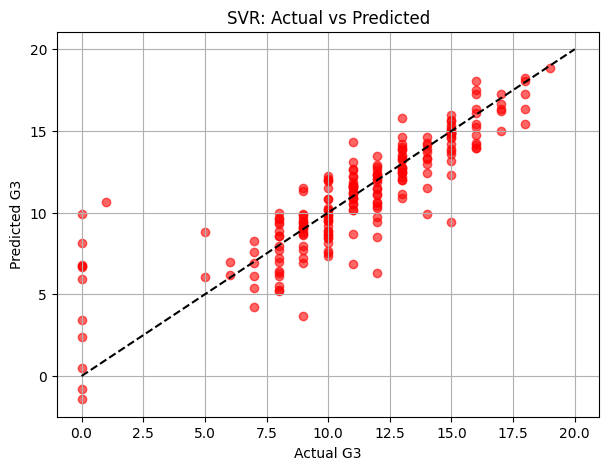

In [43]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_svr, alpha=0.6, color='red')
plt.plot([0,20],[0,20],'k--')
plt.title("SVR: Actual vs Predicted")
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.grid(True)
plt.show()


Hyperparameter tining of SVR

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Fast SVR pipeline
svr_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", SVR())
])

# Reduced + fast hyperparameter space
param_dist_svr = {
    "model__kernel": ["rbf"],             # fastest + best performing
    "model__C": [1, 5, 10, 50, 100],      # smaller range
    "model__epsilon": [0.01, 0.1, 0.2],   # common values
    "model__gamma": ["scale", "auto"]     # both options
}

# Fast RandomizedSearch
svr_search = RandomizedSearchCV(
    estimator=svr_pipe,
    param_distributions=param_dist_svr,
    n_iter=5,                # fast (5 models tested)
    cv=3,                    # fast cross-validation
    scoring="neg_mean_absolute_error",
    random_state=42,
    n_jobs=-1
)

# Run tuning
svr_search.fit(X_train, y_train)

print("Best SVR Parameters:")
print(svr_search.best_params_)
print("\nBest CV Score (negative MAE):", svr_search.best_score_)


Best SVR Parameters:
{'model__kernel': 'rbf', 'model__gamma': 'auto', 'model__epsilon': 0.2, 'model__C': 10}

Best CV Score (negative MAE): -1.0031502785798085


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_svr_model = svr_search.best_estimator_

y_pred_svr_tuned = best_svr_model.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr_tuned)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr_tuned))
r2_svr = r2_score(y_test, y_pred_svr_tuned)

print("\nTuned SVR Results:")
print("MAE :", mae_svr)
print("RMSE:", rmse_svr)
print("R²  :", r2_svr)



Tuned SVR Results:
MAE : 1.0096866694601028
RMSE: 1.782348716950354
R²  : 0.7945278893553962


In [46]:

results = {
    "Model": [
        "Random Forest (Baseline)",
        "Random Forest (Tuned)",
        "Gradient Boosting (Baseline)",
        "Gradient Boosting (Tuned)",
        "SVR (Baseline)",
        "SVR (Tuned)"
    ],
    "MAE": [0.93, 0.892, 0.900, 0.892, 1.352, 1.010],
    "RMSE": [1.63, 1.538, 1.572, 1.585, 2.077, 1.782],
    "R2": [0.83, 0.847, 0.840, 0.837, 0.721, 0.795]
}

df_results = pd.DataFrame(results)
df_results


,Model,MAE,RMSE,R2
0,Random Forest (Baseline),0.930,1.630,0.830
1,Random Forest (Tuned),0.892,1.538,0.847
2,Gradient Boosting (Baseline),0.900,1.572,0.840
3,Gradient Boosting (Tuned),0.892,1.585,0.837
4,SVR (Baseline),1.352,2.077,0.721
5,SVR (Tuned),1.010,1.782,0.795


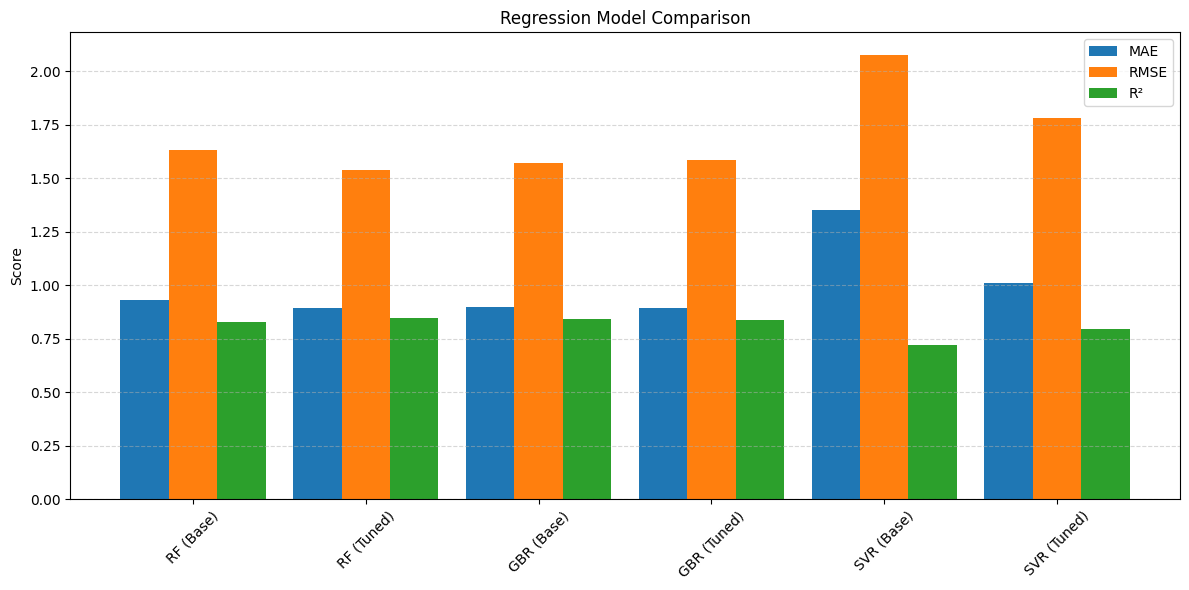

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance values
models = [
    "RF (Base)", "RF (Tuned)",
    "GBR (Base)", "GBR (Tuned)",
    "SVR (Base)", "SVR (Tuned)"
]

mae =  [0.93, 0.892, 0.900, 0.892, 1.352, 1.010]
rmse = [1.63, 1.538, 1.572, 1.585, 2.077, 1.782]
r2 =   [0.83, 0.847, 0.840, 0.837, 0.721, 0.795]

x = np.arange(len(models))
width = 0.28

plt.figure(figsize=(12,6))

plt.bar(x - width, mae, width, label='MAE')
plt.bar(x, rmse, width, label='RMSE')
plt.bar(x + width, r2, width, label='R²')

plt.xticks(x, models, rotation=45)
plt.ylabel("Score")
plt.title("Regression Model Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("model comparison.png",dpi=200, bbox_inches='tight')
plt.show()
